# Prueba de bondad de ajuste

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from fitter import Fitter, get_common_distributions

## Ejercicio 8-88

Se observa y se anota la duracion en segundos que tarda un programa en ejecutarse.

In [17]:
tiempos = [
	(2.10, 16),
	(2.11, 28),
	(2.12, 41),
	(2.13, 74),
	(2.14, 149),
	(2.15, 256),
	(2.16, 137),
	(2.17, 82),
	(2.18, 40),
	(2.19, 19),
	(2.20, 11),
]

a) La distribucion normal parece ser un modelo de probabilidad razonable para la duracion de la ejecucion? Utilize $\alpha$ = 0.05
<br>
b) Encuentre el P-valor de esta prueba.

In [18]:
tiempos_des = []
for tupla in tiempos:
	for _ in range(tupla[1]):
		tiempos_des.append(tupla[0])
tiempos = tiempos_des

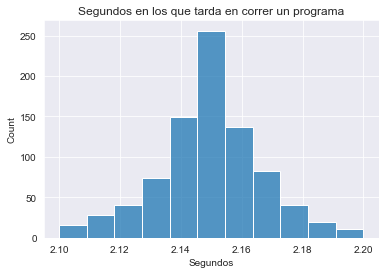

In [19]:
sns.set_style('darkgrid')
sns.histplot(tiempos_des, bins = 'sturges')
plt.xlabel('Segundos')
plt.title('Segundos en los que tarda en correr un programa')
plt.show()

In [20]:
media = np.mean(tiempos)
desv = np.std(tiempos)
media, desv

(2.1492966002344667, 0.018945778130164553)

In [30]:
clases = 7

intervalo = []
for i in range(1, clases + 1):
	val = st.norm.ppf(i / clases, media, desv)
	intervalo.append(val)
intervalo.insert(0, -np.inf)
intervalo

[-inf,
 2.129070645950768,
 2.1385742594210986,
 2.145886125815689,
 2.1527070746532444,
 2.1600189410478348,
 2.1695225545181653,
 inf]

In [44]:
intervalo = np.arange(min(tiempos_des) + 0.005, max(tiempos_des), 0.010)
intervalo = intervalo.tolist()
intervalo.insert(0, -np.inf)
intervalo.append(np.inf)
intervalo

[-inf,
 2.105,
 2.1149999999999998,
 2.1249999999999996,
 2.1349999999999993,
 2.144999999999999,
 2.154999999999999,
 2.1649999999999987,
 2.1749999999999985,
 2.1849999999999983,
 2.194999999999998,
 inf]

In [45]:
df = pd.DataFrame({'lim_inf': intervalo[:-1], 'lim_sup': intervalo[1:]})
df

,lim_inf,lim_sup
0,-inf,2.105
1,2.105,2.115
2,2.115,2.125
3,2.125,2.135
4,2.135,2.145
5,2.145,2.155
6,2.155,2.165
7,2.165,2.175
8,2.175,2.185
9,2.185,2.195


In [47]:
df['oi'] = df.apply(lambda i: sum([i['lim_inf'] <= x < i['lim_sup'] for x in sorted(tiempos)]), axis = 1)
df

,lim_inf,lim_sup,oi
0,-inf,2.105,16
1,2.105,2.115,28
2,2.115,2.125,41
3,2.125,2.135,74
4,2.135,2.145,149
5,2.145,2.155,256
6,2.155,2.165,137
7,2.165,2.175,82
8,2.175,2.185,40
9,2.185,2.195,19


In [57]:
tiempos_unique = []
for i in tiempos:
	if i not in tiempos_unique:
		tiempos_unique.append(i)
tiempos_unique = sorted(tiempos_unique)

z = [(x - media) / desv for x in tiempos_unique]
p = [st.norm.cdf(zj) for zj in z]

[-2.6019834020952097, -2.0741613231446347, -1.5463392441940367, -1.018517165243462, -0.49069508629286374, 0.03712699265771102, 0.5649490716083092, 1.092771150558884, 1.620593229509482, 2.148415308460057, 2.676237387410655] [0.004634316896396225, 0.019032165453626616, 0.06101132942233652, 0.15421612379497956, 0.3118210611844079, 0.5148081250837266, 0.7139457975287673, 0.8627528543565264, 0.947447547388305, 0.9841596111286077, 0.996277305554191]


In [66]:
st.chi2.sf(66.9360790114807, 8)

1.9963195241516277e-11